In [ ]:
print("29/10/2024\n Oversampling notebook\n Authosrs: Yasmeen")

29/10/2024
 Oversampling notebook
 Authosrs: Yasmeen


Mounting one drive

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Adding file path

In [9]:
import pandas as pd
file_path = '/content/gdrive/MyDrive/Datasets/survey lung cancer.csv'
df = pd.read_csv(file_path)
df.head

<bound method NDFrame.head of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
304                2         2         1         1                  2   
305                1         2         2         2                  2   
306                1         1         2         2                  2   
307                1         2         2         1                  2   
308                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           2                    2                      2           2   
1           1                    2                      2           2   
2           2                    2                      1           2   
3           1                    1                      2           2   
4           2                    2                      1           1   
..        ...                  ...                    ...         ...   
304         2                    2                      2           1   
305         2                    2                      1           2   
306         2                    1                      1           2   
307         2                    2                      1           2   
308         1                    1                      2           1   

    LUNG_CANCER  
0           YES  
1           YES  
2            NO  
3            NO  
4            NO  
..          ...  
304         YES  
305         YES  
306         YES  
307         YES  
308         YES  

[309 rows x 16 columns]>

Installing needed libraries

In [ ]:
!pip install imbalanced-learn

using random oversampling to balance out the dataset

In [4]:

import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from collections import Counter


data = pd.read_csv('/content/gdrive/My Drive/Datasets/survey lung cancer.csv')


X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']


print("Original class distribution:", Counter(y))


ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


print("Resampled class distribution:", Counter(y_resampled))


balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
print(balanced_data.head())



Original class distribution: Counter({'YES': 270, 'NO': 39})
Resampled class distribution: Counter({'YES': 270, 'NO': 270})
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1       

Save the balanced dataset to a new CSV file

In [ ]:

balanced_data.to_csv('/content/gdrive/MyDrive/Datasets/balanced_survey_lung_cancer.csv', index=False)


Check for duplicates in the balanced dataset

In [ ]:

minority_class_duplicates = balanced_data[balanced_data.duplicated()]
print("Number of duplicates after oversampling:", len(minority_class_duplicates))


Number of duplicates after oversampling: 264


Performing a comparison of the minority class

In [ ]:

original_minority = data[data['LUNG_CANCER'] == 'NO']
oversampled_minority = balanced_data[balanced_data['LUNG_CANCER'] == 'NO']


print("Original minority summary statistics:\n", original_minority.describe())
print("Oversampled minority summary statistics:\n", oversampled_minority.describe())


Original minority summary statistics:
              AGE    SMOKING  YELLOW_FINGERS    ANXIETY  PEER_PRESSURE  \
count  39.000000  39.000000       39.000000  39.000000      39.000000   
mean   60.743590   1.487179        1.333333   1.307692       1.256410   
std     9.629226   0.506370        0.477567   0.467572       0.442359   
min    21.000000   1.000000        1.000000   1.000000       1.000000   
25%    57.000000   1.000000        1.000000   1.000000       1.000000   
50%    61.000000   1.000000        1.000000   1.000000       1.000000   
75%    65.500000   2.000000        2.000000   2.000000       1.500000   
max    87.000000   2.000000        2.000000   2.000000       2.000000   

       CHRONIC DISEASE   FATIGUE    ALLERGY    WHEEZING  ALCOHOL CONSUMING  \
count        39.000000  39.000000  39.000000  39.000000          39.000000   
mean          1.358974   1.487179   1.128205   1.230769           1.179487   
std           0.485971   0.506370   0.338688   0.426833           0.3

Visualizing before balancing and after balancing

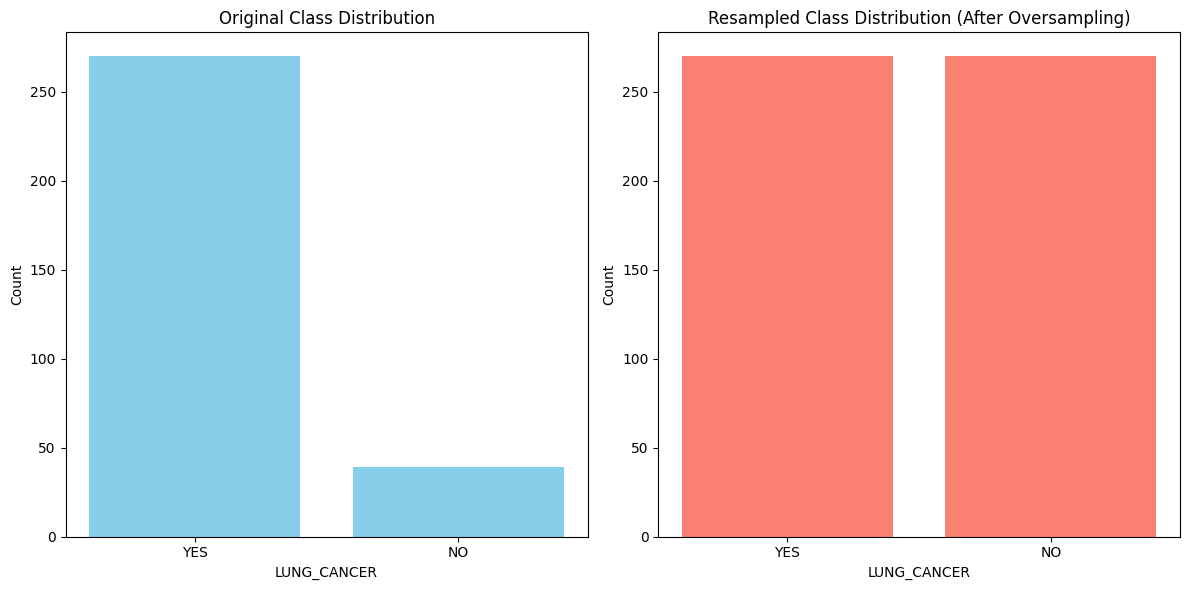

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter


original_class_counts = Counter(data['LUNG_CANCER'])
balanced_class_counts = Counter(balanced_data['LUNG_CANCER'])


fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].bar(original_class_counts.keys(), original_class_counts.values(), color='skyblue')
ax[0].set_title('Original Class Distribution')
ax[0].set_xlabel('LUNG_CANCER')
ax[0].set_ylabel('Count')


ax[1].bar(balanced_class_counts.keys(), balanced_class_counts.values(), color='salmon')
ax[1].set_title('Resampled Class Distribution (After Oversampling)')
ax[1].set_xlabel('LUNG_CANCER')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Adding path to the balanced dataset.

In [16]:
import pandas as pd
file_path = '/content/gdrive/My Drive/Datasets/balanced_survey_lung_cancer.csv'
df = pd.read_csv(file_path)
df.head

<bound method NDFrame.head of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
535      F   60        2               1        1              1   
536      M   55        2               1        1              1   
537      F   55        2               1        2              1   
538      M   69        1               1        1              2   
539      F   87        1               1        1              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
535                1         2         1         1                  1   
536                1         2         2         1                  1   
537                1         2         1         1                  1   
538                1         2         1         2                  1   
539                2         2         1         1                  1   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           2                    2                      2           2   
1           1                    2                      2           2   
2           2                    2                      1           2   
3           1                    1                      2           2   
4           2                    2                      1           1   
..        ...                  ...                    ...         ...   
535         1                    2                      1           1   
536         1                    2                      1           2   
537         1                    1                      1           1   
538         2                    2                      1           2   
539         1                    2                      1           1   

    LUNG_CANCER  
0           YES  
1           YES  
2            NO  
3            NO  
4            NO  
..          ...  
535          NO  
536          NO  
537          NO  
538          NO  
539          NO  

[540 rows x 16 columns]>

simple code using scikit-learn to train and evaluate the effectivness of the random forest classifier on the balanced dataset. it outputs f1 scores, recall and precision.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

data = pd.read_csv('/content/gdrive/MyDrive/Datasets/balanced_survey_lung_cancer.csv')


X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

#using one-hot encoding to transform categorial data into numeric
X = pd.get_dummies(X)


ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


balanced_data = pd.concat([X_resampled, y_resampled], axis=1)


X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

          NO       0.96      1.00      0.98        81
         YES       1.00      0.96      0.98        81

    accuracy                           0.98       162
   macro avg       0.98      0.98      0.98       162
weighted avg       0.98      0.98      0.98       162



Visualizing precision, recall and f1 score from the classification report

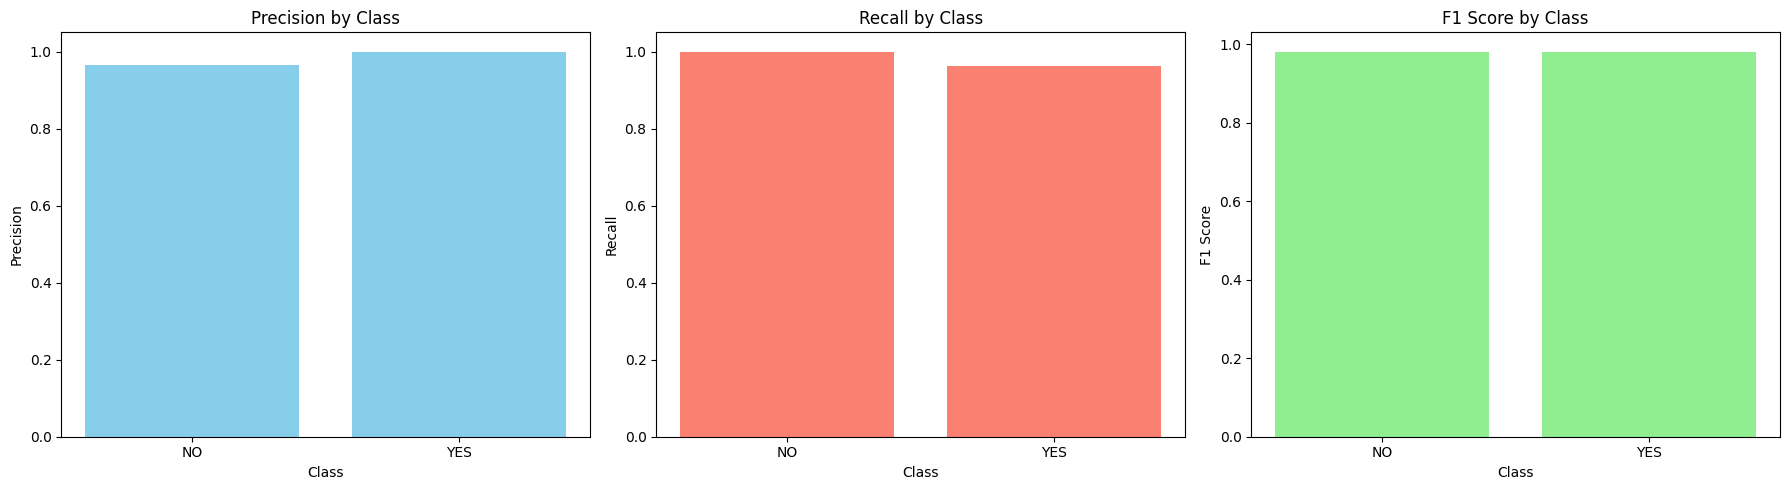

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


report = classification_report(y_val, y_pred, output_dict=True)


classes = list(report.keys())[:-3]
precision = [report[cls]["precision"] for cls in classes]
recall = [report[cls]["recall"] for cls in classes]
f1_score = [report[cls]["f1-score"] for cls in classes]


fig, ax = plt.subplots(1, 3, figsize=(18, 5))


ax[0].bar(classes, precision, color='skyblue')
ax[0].set_title("Precision by Class")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Precision")


ax[1].bar(classes, recall, color='salmon')
ax[1].set_title("Recall by Class")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Recall")


ax[2].bar(classes, f1_score, color='lightgreen')
ax[2].set_title("F1 Score by Class")
ax[2].set_xlabel("Class")
ax[2].set_ylabel("F1 Score")

plt.tight_layout()
plt.show()
